<a href="https://colab.research.google.com/github/Shambhavikr28/Technical-Indicators/blob/Tech_Ind_Task1/Technical_Indicators(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Extraction of Past Data:-

---
The company chosen for this task is Samsung and it goes with the ticker symbol -'SMSD.IL'.


In [ ]:
sams=yf.Ticker("SMSD.IL")
sams.info
sams.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-25 00:00:00+00:00,1149.607593,1151.596534,1136.082822,1137.673950,3196,0.0,0.0
2023-01-26 00:00:00+00:00,1155.574438,1163.530200,1151.596557,1161.541260,421,0.0,0.0
2023-01-27 00:00:00+00:00,1167.508056,1177.452759,1161.541235,1177.452759,511,0.0,0.0
2023-01-30 00:00:00+00:00,1157.563330,1157.563330,1149.607568,1153.585449,744,0.0,0.0
2023-01-31 00:00:00+00:00,1119.773487,1134.988930,1099.884082,1107.839844,1049,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-18 00:00:00+00:00,1090.000000,1110.000000,1088.000000,1110.000000,2671,0.0,0.0
2024-01-19 00:00:00+00:00,1122.000000,1136.000000,1120.000000,1120.000000,1474,0.0,0.0
2024-01-22 00:00:00+00:00,1134.000000,1156.000000,1126.000000,1126.000000,1965,0.0,0.0


Keeping the necessary data:-

In [ ]:
sams_newdata=sams.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
print(sams_newdata)

                                  Open         High          Low        Close
Date                                                                         
2023-01-25 00:00:00+00:00  1149.607593  1151.596534  1136.082822  1137.673950
2023-01-26 00:00:00+00:00  1155.574438  1163.530200  1151.596557  1161.541260
2023-01-27 00:00:00+00:00  1167.508056  1177.452759  1161.541235  1177.452759
2023-01-30 00:00:00+00:00  1157.563330  1157.563330  1149.607568  1153.585449
2023-01-31 00:00:00+00:00  1119.773487  1134.988930  1099.884082  1107.839844
...                                ...          ...          ...          ...
2024-01-18 00:00:00+00:00  1090.000000  1110.000000  1088.000000  1110.000000
2024-01-19 00:00:00+00:00  1122.000000  1136.000000  1120.000000  1120.000000
2024-01-22 00:00:00+00:00  1134.000000  1156.000000  1126.000000  1126.000000
2024-01-23 00:00:00+00:00  1132.000000  1134.000000  1120.000000  1128.000000
2024-01-25 00:00:00+00:00  1122.000000  1136.000000  1122.000000

Simple Moving Average (SMA) Calculation

                                 Close    SMA20
Date                                           
2023-01-25 00:00:00+00:00  1137.673950      NaN
2023-01-26 00:00:00+00:00  1161.541260      NaN
2023-01-27 00:00:00+00:00  1177.452759      NaN
2023-01-30 00:00:00+00:00  1153.585449      NaN
2023-01-31 00:00:00+00:00  1107.839844      NaN
...                                ...      ...
2024-01-18 00:00:00+00:00  1110.000000  1120.52
2024-01-19 00:00:00+00:00  1120.000000  1120.88
2024-01-22 00:00:00+00:00  1126.000000  1121.80
2024-01-23 00:00:00+00:00  1128.000000  1122.80
2024-01-25 00:00:00+00:00  1126.000000  1123.76

[249 rows x 2 columns]


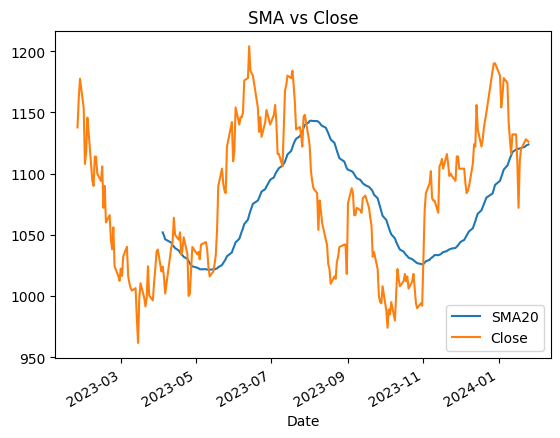

In [ ]:
sams_sma=sams_newdata
sams_sma=sams_sma['Close'].to_frame()
sams_sma['SMA20']=sams_sma.rolling(50).mean()
sams_sma[['SMA20', 'Close']].plot(title="SMA vs Close")
print (sams_sma)

Exponential Moving Average (EMA) Calculation

                                 Close        EMA20
Date                                               
2023-01-25 00:00:00+00:00  1137.673950  1137.673950
2023-01-26 00:00:00+00:00  1161.541260  1150.204288
2023-01-27 00:00:00+00:00  1177.452759  1160.209763
2023-01-30 00:00:00+00:00  1153.585449  1158.297426
2023-01-31 00:00:00+00:00  1107.839844  1146.092166
...                                ...          ...
2024-01-18 00:00:00+00:00  1110.000000  1130.469022
2024-01-19 00:00:00+00:00  1120.000000  1129.471972
2024-01-22 00:00:00+00:00  1126.000000  1129.141308
2024-01-23 00:00:00+00:00  1128.000000  1129.032612
2024-01-25 00:00:00+00:00  1126.000000  1128.743792

[249 rows x 2 columns]


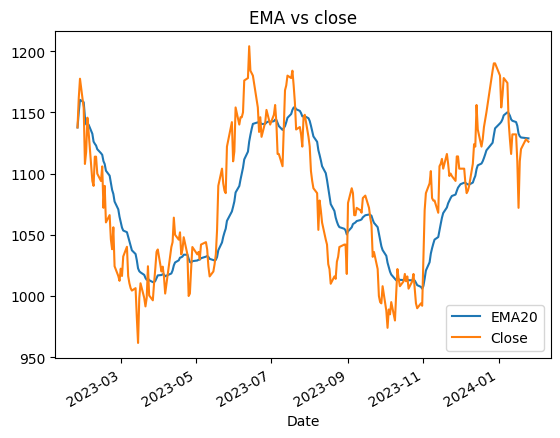

In [ ]:
sams_ema=sams_newdata
sams_ema=sams_ema['Close'].to_frame()
sams_ema['EMA20']=sams_ema.ewm(span=20).mean()
sams_ema[['EMA20','Close']].plot(title="EMA vs close")
print(sams_ema)

Price Data Extraction for RSI

In [ ]:
price_data=yf.download('SMSD.IL',start="2023-03-03",end="2024-01-01")['Close']
print(price_data)

[*********************100%%**********************]  1 of 1 completed

Date
2023-03-03    1038.0
2023-03-06    1046.0
2023-03-07    1022.0
2023-03-08    1016.0
2023-03-09    1012.0
               ...  
2023-12-21    1144.0
2023-12-22    1150.0
2023-12-27    1184.0
2023-12-28    1190.0
2023-12-29    1190.0
Name: Close, Length: 205, dtype: float64


Relative Strength Index (RSI) Calculation

In [ ]:
def RSIcalc(price_data):
 final_price=price_data.diff()
 gain=final_price.where(final_price>0,0)
 loss=-final_price.where(final_price<0,0)
 avg_gain=gain.rolling(window=14).mean()
 avg_loss=loss.rolling(window=14).mean()
 rs=avg_gain/avg_loss
 rsi=100-(100/(1+rs))
 return rsi
 RSIcalc[['rsi','Close']].plot(title="rsi vs close")
print(RSIcalc(price_data))


Date
2023-03-03          NaN
2023-03-06          NaN
2023-03-07          NaN
2023-03-08          NaN
2023-03-09          NaN
                ...    
2023-12-21    63.157895
2023-12-22    64.556962
2023-12-27    75.555556
2023-12-28    79.775281
2023-12-29    79.545455
Name: Close, Length: 205, dtype: float64


Moving Average Convergence/Divergence (MACD) Calculation

                                 Close      MACD
Date                                            
2023-01-25 00:00:00+00:00  1137.673950  0.000000
2023-01-26 00:00:00+00:00  1161.541260  0.535485
2023-01-27 00:00:00+00:00  1177.452759  1.175728
2023-01-30 00:00:00+00:00  1153.585449  0.576389
2023-01-31 00:00:00+00:00  1107.839844 -1.581740
...                                ...       ...
2024-01-18 00:00:00+00:00  1110.000000 -3.783911
2024-01-19 00:00:00+00:00  1120.000000 -3.951142
2024-01-22 00:00:00+00:00  1126.000000 -3.558504
2024-01-23 00:00:00+00:00  1128.000000 -3.050785
2024-01-25 00:00:00+00:00  1126.000000 -2.777776

[249 rows x 2 columns]


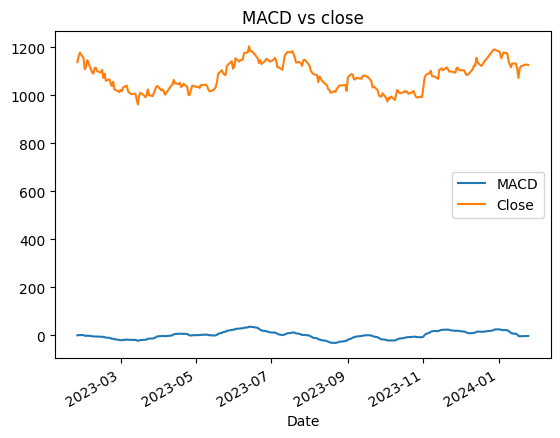

In [ ]:
sams_macd=sams_newdata
sams_macd=sams_macd['Close'].to_frame()
sams_macd["MACD"]=sams_macd.ewm(span=12).mean()-sams_macd.ewm(span=26).mean()
sams_macd[['MACD','Close']].plot(title="MACD vs close")
print(sams_macd)

Bollinger Bands Calculation

                                  Open         High          Low        Close  \
Date                                                                            
2023-01-25 00:00:00+00:00  1149.607593  1151.596534  1136.082822  1137.673950   
2023-01-26 00:00:00+00:00  1155.574438  1163.530200  1151.596557  1161.541260   
2023-01-27 00:00:00+00:00  1167.508056  1177.452759  1161.541235  1177.452759   
2023-01-30 00:00:00+00:00  1157.563330  1157.563330  1149.607568  1153.585449   
2023-01-31 00:00:00+00:00  1119.773487  1134.988930  1099.884082  1107.839844   
...                                ...          ...          ...          ...   
2024-01-18 00:00:00+00:00  1090.000000  1110.000000  1088.000000  1110.000000   
2024-01-19 00:00:00+00:00  1122.000000  1136.000000  1120.000000  1120.000000   
2024-01-22 00:00:00+00:00  1134.000000  1156.000000  1126.000000  1126.000000   
2024-01-23 00:00:00+00:00  1132.000000  1134.000000  1120.000000  1128.000000   
2024-01-25 00:00:00+00:00  1

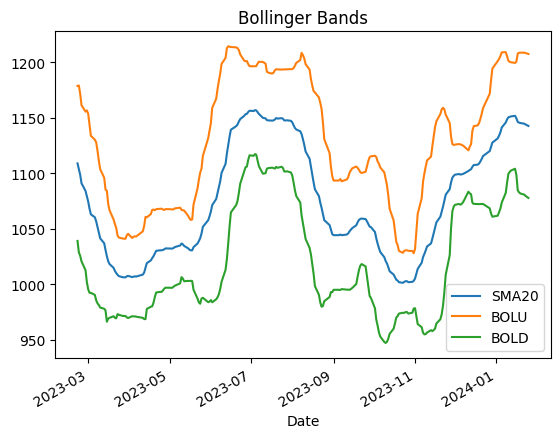

In [ ]:
sams_bolb=sams_newdata
sams_bolb=sams_newdata['Close'].to_frame()
sams_bolb=sams_newdata.assign(SMA20=sams_bolb.rolling(20).mean(),
                              BOLU=sams_bolb.rolling(20).mean()+2*sams_bolb.rolling(20).std(),
                              BOLD=sams_bolb.rolling(20).mean()-2*sams_bolb.rolling(20).std())
sams_bolb[['SMA20','BOLU','BOLD']].plot(title="Bollinger Bands")
print(sams_bolb)